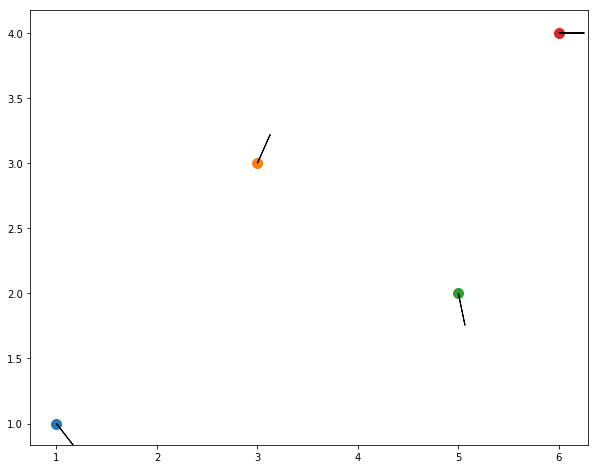

In [16]:
from SE2 import SE2

p1 = SE2 (1, 1, -45)
p2 = SE2 (3, 3, 60)
p3 = SE2 (5, 2, -75)
p4 = SE2 (6, 4, 0)

# Plot the points
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10, 8))

p1.draw(plt)
p2.draw(plt)
p3.draw(plt)
p4.draw(plt)

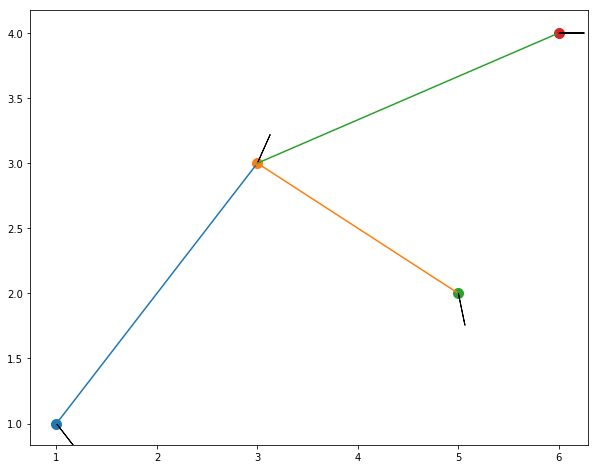

In [72]:
# Plot the C_0 lines between the points

import numpy as np

fig=plt.figure(figsize=(10, 8))

p1.draw(plt)
p2.draw(plt)
p3.draw(plt)
p4.draw(plt)

def C0line(s1, s2):
    t = np.arange(0, 1, 0.01)
    lx = s1.x + (s2.x - s1.x) * t
    ly = s1.y + (s2.y - s1.y) * t
    return (lx, ly)

l1x, l1y = C0line(p1, p2)
plt.plot(l1x, l1y)
l2x, l2y = C0line(p2, p3)
plt.plot(l2x, l2y)
l3x, l3y = C0line(p2, p4)
plt.plot(l3x, l3y)


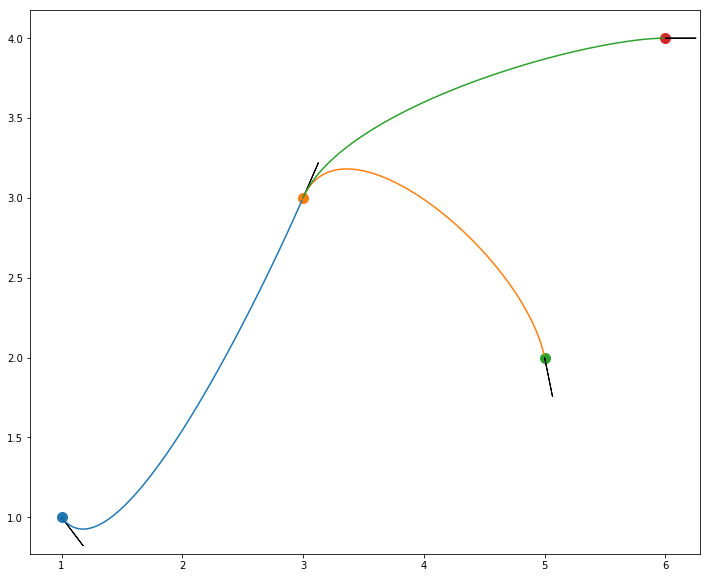

In [71]:
import math

def Hermite(f1, f2, df1, df2):
    M = [[0, 0, 0, 1], [1, 1, 1, 1], [0, 0, 1, 0], [3, 2, 1, 0]]
    y = [f1, f2, df1, df2]
    x = np.linalg.solve(M, y)
    return x

def C1Hermite(s1, s2, speed):
    cx = Hermite(s1.x, s2.x, speed*math.cos(math.radians(s1.theta)), speed*math.cos(math.radians(s2.theta)))
    cy = Hermite(s1.y, s2.y, speed*math.sin(math.radians(s1.theta)), speed*math.sin(math.radians(s2.theta)))
    px = lambda c, x : c[0]*x**3 + c[1]*x**2 + c[2]*x + c[3]
    t = np.arange(0, 1, 0.01)
    x = map(lambda x : px(cx,x), t)
    y = map(lambda y : px(cy, y), t)
    return (list(x),list(y))
    
fig=plt.figure(figsize=(12, 10))

p1.draw(plt)
p2.draw(plt)
p3.draw(plt)
p4.draw(plt)

speed = 2
x1, y1 = C1Hermite(p1, p2, speed)
plt.plot(x1, y1)
x2, y2 = C1Hermite(p2, p3, speed)
plt.plot(x2, y2)
x3, y3 = C1Hermite(p2, p4, speed)
plt.plot(x3, y3)

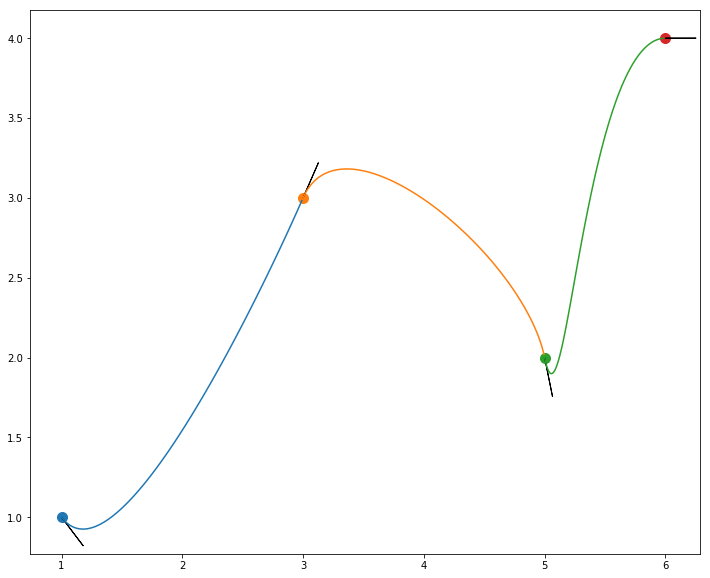

In [75]:
fig=plt.figure(figsize=(12, 10))

p1.draw(plt)
p2.draw(plt)
p3.draw(plt)
p4.draw(plt)

speed = 2
x1, y1 = C1Hermite(p1, p2, speed)
plt.plot(x1, y1)
x2, y2 = C1Hermite(p2, p3, speed)
plt.plot(x2, y2)
x3, y3 = C1Hermite(p3, p4, speed)
plt.plot(x3, y3)


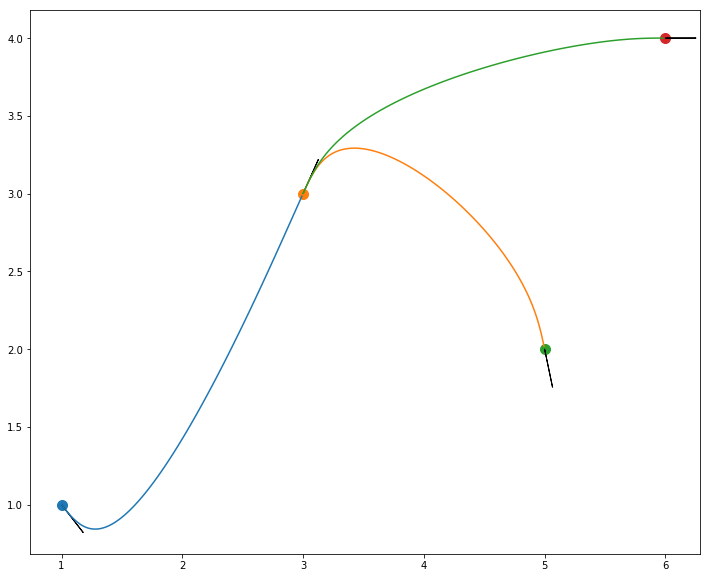

In [78]:
# Hermite interpolation with the second derivative also
def Hermite3(f1, f2, df1, df2, ddf1, ddf2):
    M = [[0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 1, 0], 
         [5, 4, 3, 2, 1, 0], [0, 0, 0, 2, 0, 0], [20, 12, 6, 2, 0, 0]]
    y = [f1, f2, df1, df2, ddf1, ddf2]
    x = np.linalg.solve(M, y)
    return x

def C2Hermite(s1, s2, speed):
    cx = Hermite3(s1.x, s2.x, speed*math.cos(math.radians(s1.theta)), speed*math.cos(math.radians(s2.theta)), 0, 0)
    cy = Hermite3(s1.y, s2.y, speed*math.sin(math.radians(s1.theta)), speed*math.sin(math.radians(s2.theta)), 0, 0)
    px = lambda c, x : c[0]*x**5 + c[1]*x**4 + c[2]*x**3 + c[3]*x**2 + c[4]*x + c[5]
    t = np.arange(0, 1, 0.01)
    x = map(lambda x : px(cx,x), t)
    y = map(lambda y : px(cy, y), t)
    return (list(x),list(y))

fig=plt.figure(figsize=(12, 10))

p1.draw(plt)
p2.draw(plt)
p3.draw(plt)
p4.draw(plt)

speed = 2
x1, y1 = C2Hermite(p1, p2, speed)
plt.plot(x1, y1)
x2, y2 = C2Hermite(p2, p3, speed)
plt.plot(x2, y2)
x3, y3 = C2Hermite(p2, p4, speed)
plt.plot(x3, y3)

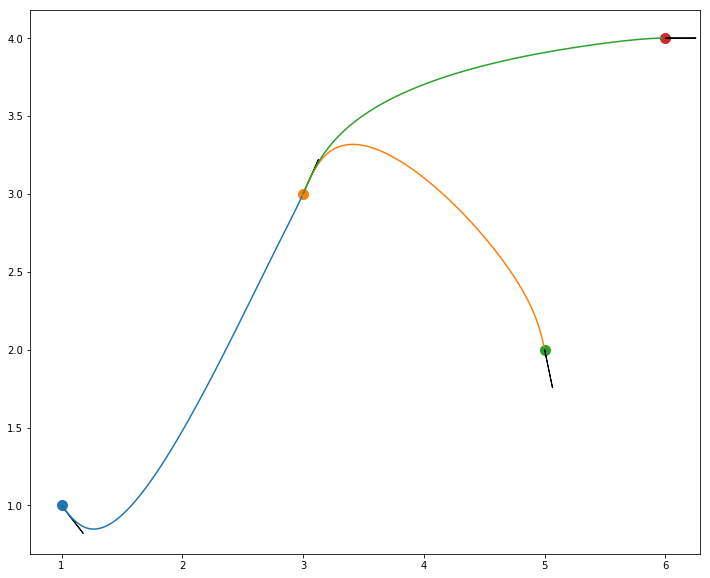

In [82]:
def C2HermiteAvg(s1, s2, speed, ddx0, ddy0):
    dx1 = speed*math.cos(math.radians(s1.theta))
    dx2 = speed*math.cos(math.radians(s2.theta))
    ddx1 = dx2 - dx1
    cx = Hermite3(s1.x, s2.x, dx1, dx2, ddx0, ddx1)
    dy1 = speed*math.sin(math.radians(s1.theta))
    dy2 = speed*math.sin(math.radians(s2.theta))
    ddy1 = dy2 - dy1
    cy = Hermite3(s1.y, s2.y, dy1, dy2, ddy0, ddy1)
    px = lambda c, x : c[0]*x**5 + c[1]*x**4 + c[2]*x**3 + c[3]*x**2 + c[4]*x + c[5]
    t = np.arange(0, 1, 0.01)
    x = map(lambda x : px(cx,x), t)
    y = map(lambda y : px(cy, y), t)
    return (list(x),list(y),ddx1, ddy1)

fig=plt.figure(figsize=(12, 10))

p1.draw(plt)
p2.draw(plt)
p3.draw(plt)
p4.draw(plt)

speed = 2
x1, y1, ddx1, ddy1 = C2HermiteAvg(p1, p2, speed, 0, 0)
plt.plot(x1, y1)
x2, y2, ddx2, ddy2 = C2HermiteAvg(p2, p3, speed, ddx1, ddy1)
plt.plot(x2, y2)
x3, y3, ddx3, ddy3 = C2HermiteAvg(p2, p4, speed, ddx1, ddy1)
plt.plot(x3, y3)
